### Experimental Holography

TODO

In [1]:
# Header
# ipython configuration (reloads source code automatically and plots inline)
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline

import os, sys
import numpy as np
import cv2

import matplotlib as mpl
import matplotlib.pyplot as plt

# Add slmsuite to the python path. TODO: Remove and replace with package import
sys.path.append(os.path.join(os.getcwd(), '../..'))

import slmsuite.holography.lcos_toolbox as lcos_toolbox

from slmsuite.hardware.slms import Santec
from slmsuite.hardware.slms import ScreenMirrored

from slmsuite.hardware.cameras import ThorCam

from slmsuite.hardware.cameraslms import FourierSLM

vimba not installed. Install to use AlliedVision cameras.
PySpin not installed. Install to use FLIR cameras.
pymmcore not installed. Install to use Micro-Manager cameras.
No cupy installed, using numpy.


In [2]:
Santec.info();

display_number, display_name:
#,  Name
1,  SB220Q,ACR,06AB,50341080
2,  LCOS-SLM,SOC,8001,2018021001
3,  Thorlabs SLM,THO,9212,007
4,  Thorlabs SLM,THO,9212,007
5,  Thorlabs SLM,THO,9212,007
6,  Thorlabs SLM,THO,9212,007
7,  Thorlabs SLM,THO,9212,007


In [3]:
slm2 = Santec(slm_number=1, display_number=2)

Santec initializing... success
Looking for display... success
Opening LCOS-SLM,SOC,8001,2018021001... success
Error while loading flatmap.
Wavefront_correction_Data_211236000001(520nm).csv not found.


In [4]:
ScreenMirrored.info();

Display Postions:
#,  Position
0,  x=0, y=0, width=1920, height=1080 (main)
1,  x=-1920, y=-126, width=1920, height=1200
2,  x=1920, y=-126, width=1920, height=1200


In [5]:
slm = ScreenMirrored(display_number=2, wav_um=.780, wav_design_um=1.064, dx_um=8, dy_um=8, name="SLM")

Initializing pyglet... success
Searching for window with display_number=2... success
Creating window... success


c:\Users\experiment\anaconda3\envs\atomarray\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


In [6]:
ScreenMirrored.info();

Display Postions:
#,  Position
0,  x=0, y=0, width=1920, height=1080 (main)
1,  x=-1920, y=-126, width=1920, height=1200
2,  x=1920, y=-126, width=1920, height=1200 (has ScreenMirrored)


In [7]:
ThorCam.info();

ThorCam serials:
"09717"
"13316"
"17042"


In [8]:
cam = ThorCam(serial="09717", verbose=True, fliplr=True)

TLCameraSDK initializing... success
Looking for cameras... success
ThorCam sn "09717" initializing... success


In [11]:
cam.set_exposure(5e-5)

In [12]:
fs = FourierSLM(cam, slm)

100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


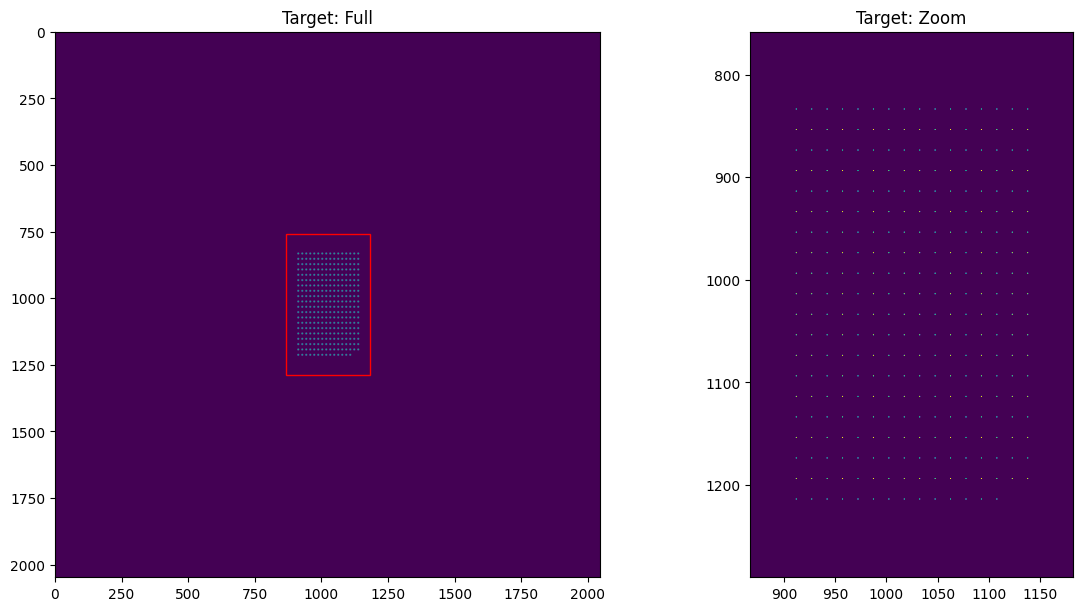

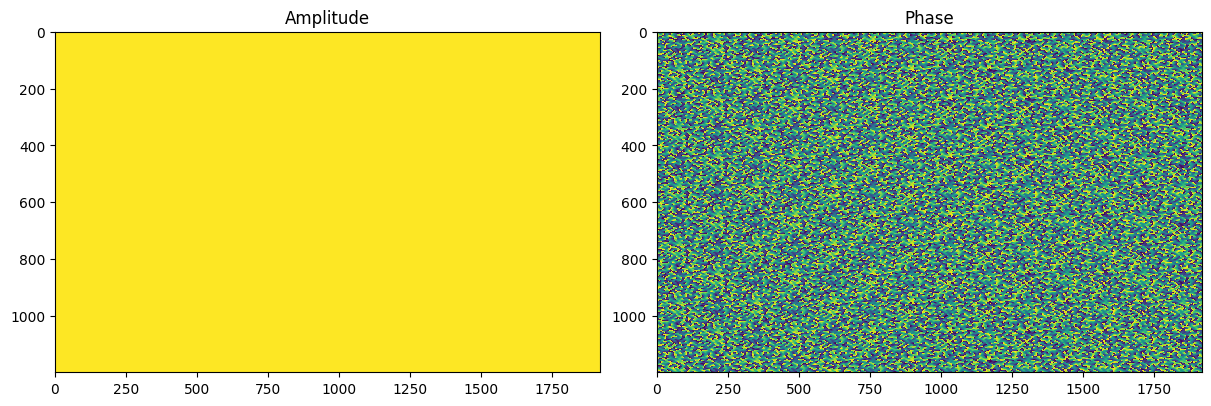

c:\Users\experiment\anaconda3\envs\atomarray\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


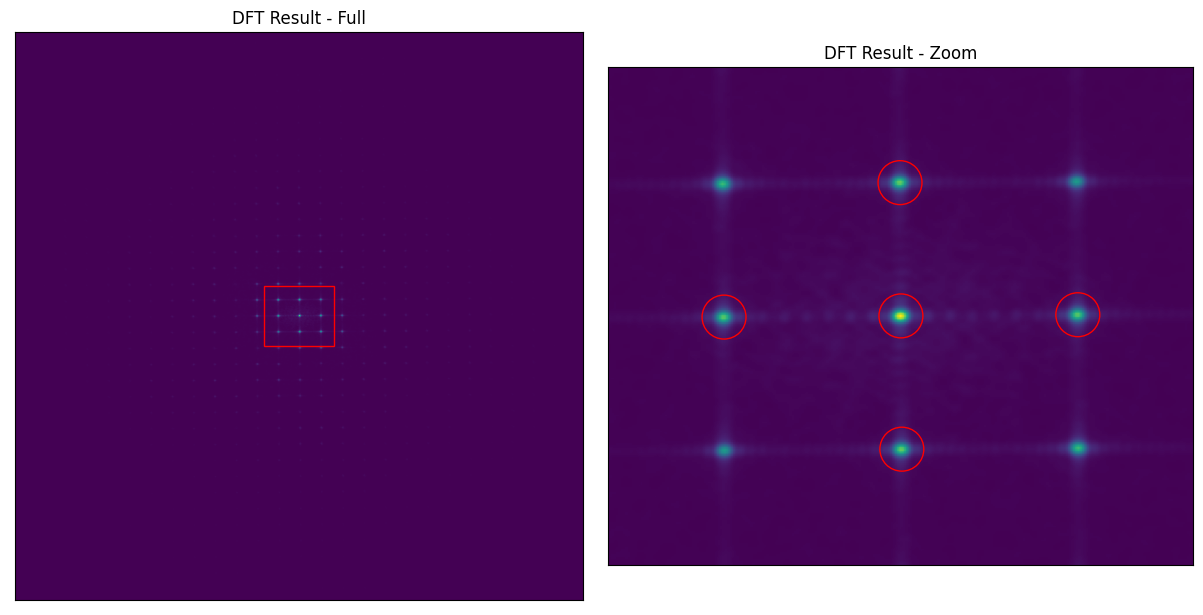

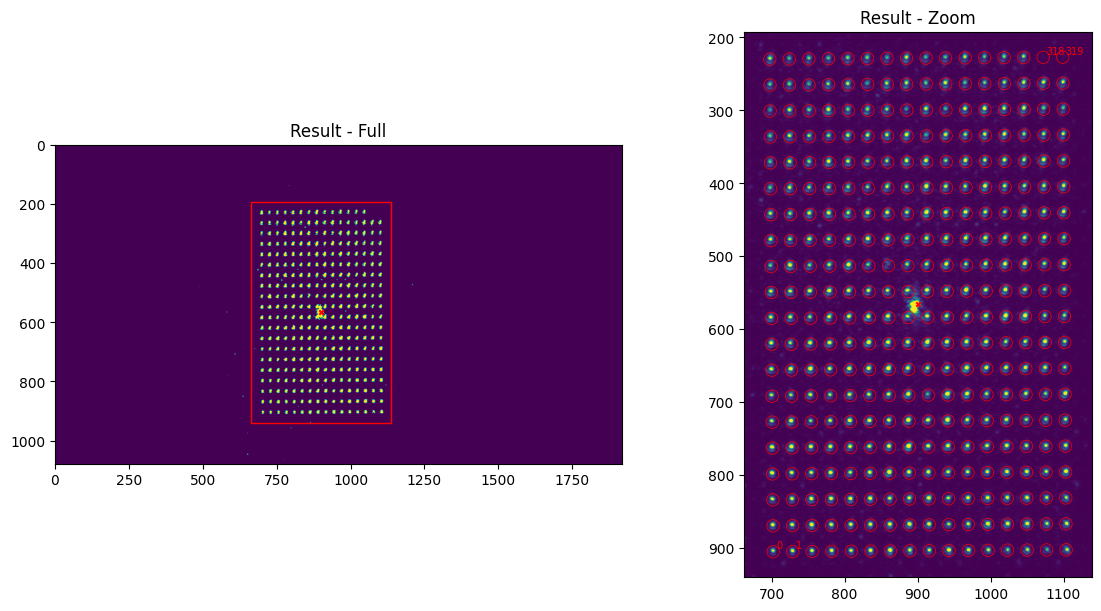

{'M': array([[ 37481.71681006,   -256.58864965],
        [  -249.18831432, -37314.26806061]]),
 'b': array([[900.5],
        [566. ]]),
 'a': array([[0],
        [0]])}

In [13]:
fs.fourier_calibrate(array_shape=[16, 20], array_pitch=[15, 20], maxiter=10)

In [42]:
cam.set_exposure(5e-4)

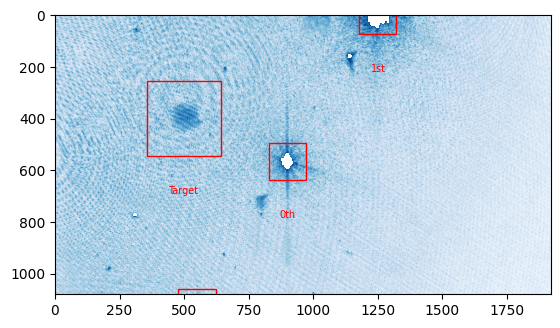

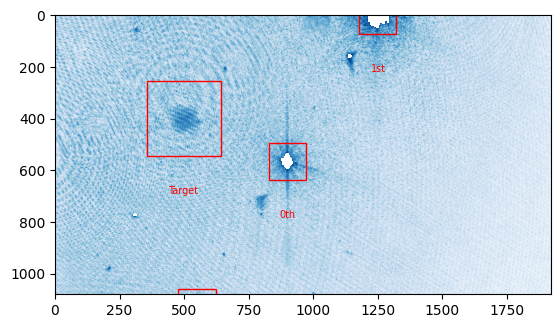

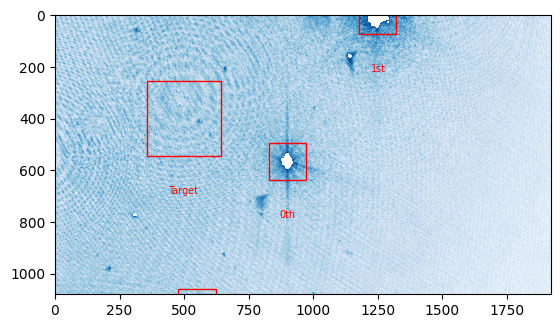

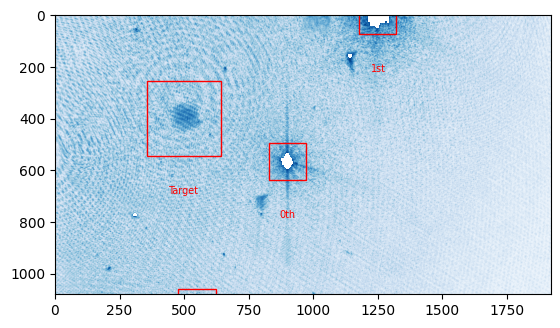

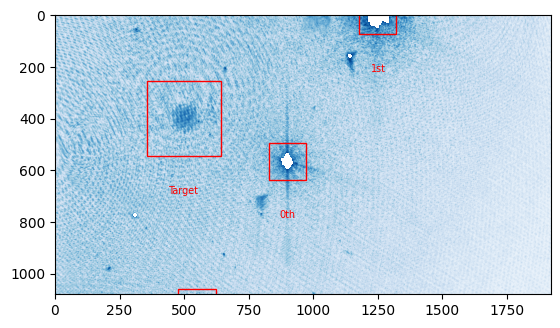

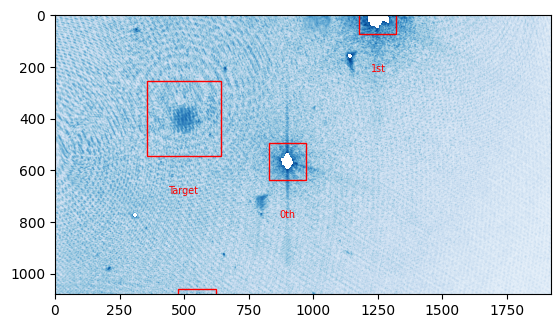

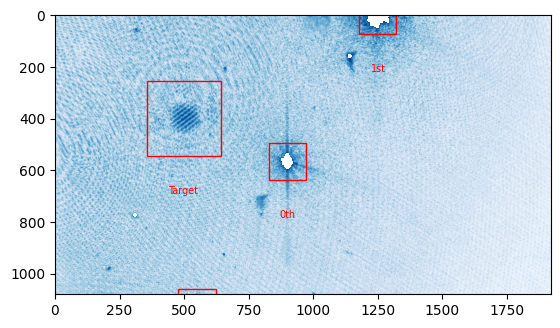

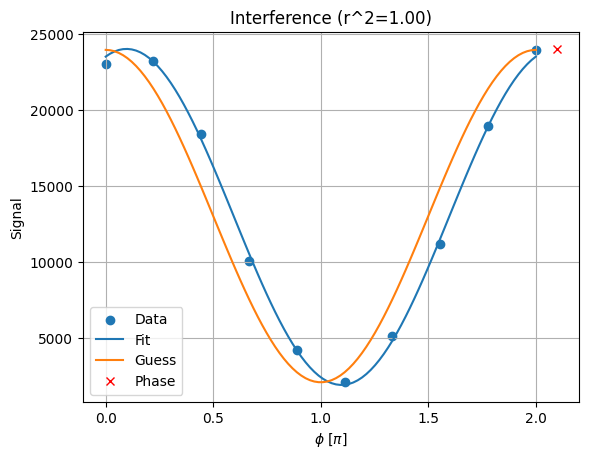

{'power': 55035759,
 'normalization': 57705285,
 'background': 21348859,
 'phase': 6.586946138324326,
 'kx': array([2.75957163e-05]),
 'ky': array([0.00013381]),
 'amp_fit': 22113.030656682535,
 'contrast_fit': 0.92005820363771,
 'r2_fit': 0.9982927717669862}

In [43]:
fs.wavefront_calibrate((500, 400), (1250, 0), superpixel_size=50, test_interference=(16,16), autoexposure=False)

In [44]:
fs.wavefront_calibrate((500, 400), (1250, 0), superpixel_size=50, autoexposure=False)

{'NX': 39,
 'NY': 24,
 'nxref': 19,
 'nyref': 12,
 'superpixel_size': 50,
 'interference_point': array([[500],
        [400]]),
 'interference_size': array([[72],
        [73]]),
 'power': array([[21425652., 22142412., 22344666., 22358796., 22226168., 22407836.,
         22190408., 22077256., 21887112., 21686376., 21617874., 21733288.,
         21889454., 22054154., 22386576., 22953396., 23194930., 23223794.,
         23212380., 23201440., 23185274., 23127158., 23004496., 22912448.,
         23022456., 23332450., 23400488., 23582396., 23290160., 23236128.,
         23259802., 23362740., 23167220., 23013288., 22862908., 22981744.,
         22769272., 22440856., 22508984.],
        [22772606., 21935394., 22036832., 21477370., 21333428., 21393896.,
         21560126., 21414662., 20743032., 20928326., 20756820., 20967904.,
         20978776., 21416632., 30812310., 32489082., 31086064., 32656544.,
         25600858., 21297752., 21124676., 21184652., 20974932., 20825494.,
         20664440.,

In [45]:
fs.save_wavefront_calibration()

c:\Users\experiment\repos\qp-slm\docs\examples\09717-SLM-wavefront-calibration_00003.h5
w


'c:\\Users\\experiment\\repos\\qp-slm\\docs\\examples\\09717-SLM-wavefront-calibration_00003.h5'

In [115]:
fs.wavefront_calibration_raw['kx'] *= -1
fs.wavefront_calibration_raw['ky'] *= -1

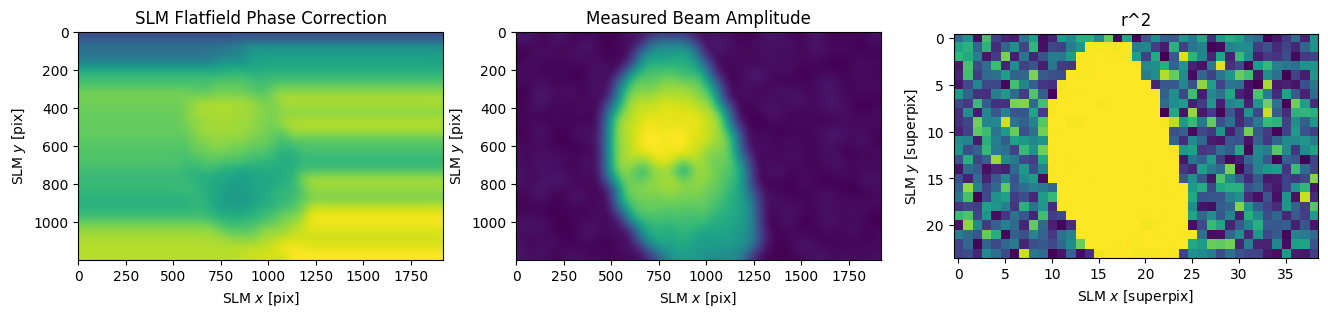

{'phase_correction': array([[1.58249485, 1.58249485, 1.58249485, ..., 1.60510598, 1.60510325,
         1.60510234],
        [1.58266601, 1.58266601, 1.58266601, ..., 1.60533511, 1.60533238,
         1.60533147],
        [1.5831702 , 1.5831702 , 1.5831702 , ..., 1.60601795, 1.6060152 ,
         1.60601429],
        ...,
        [5.60322653, 5.60322653, 5.60322653, ..., 6.28285258, 6.28287453,
         6.28288186],
        [5.60326491, 5.60326491, 5.60326491, ..., 6.28308213, 6.28310408,
         6.28311141],
        [5.60327619, 5.60327619, 5.60327619, ..., 6.28315603, 6.28317798,
         0.        ]]),
 'measured_amplitude': array([[0.06868408, 0.06868684, 0.06869512, ..., 0.05564341, 0.05565501,
         0.05565886],
        [0.06867652, 0.06867928, 0.06868754, ..., 0.05563878, 0.05565038,
         0.05565424],
        [0.06865384, 0.06865659, 0.06866485, ..., 0.05562492, 0.05563651,
         0.05564037],
        ...,
        [0.06736571, 0.06735796, 0.06733467, ..., 0.05240671, 0.05

In [156]:
fs.process_wavefront_calibration(r2_thresh=.95, smooth=True)

100%|██████████| 10/10 [00:12<00:00,  1.28s/it]


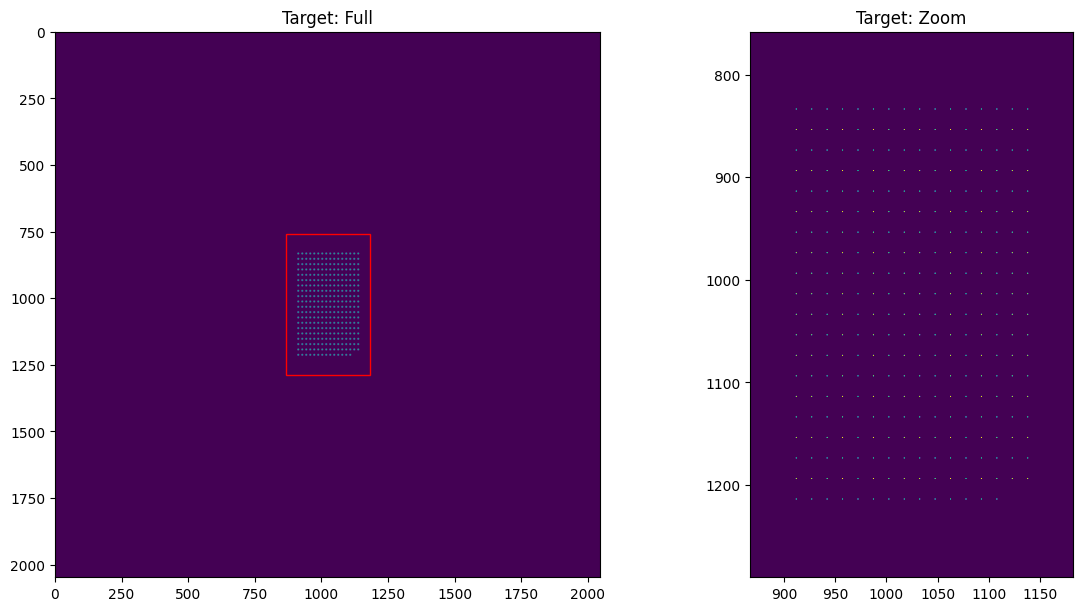

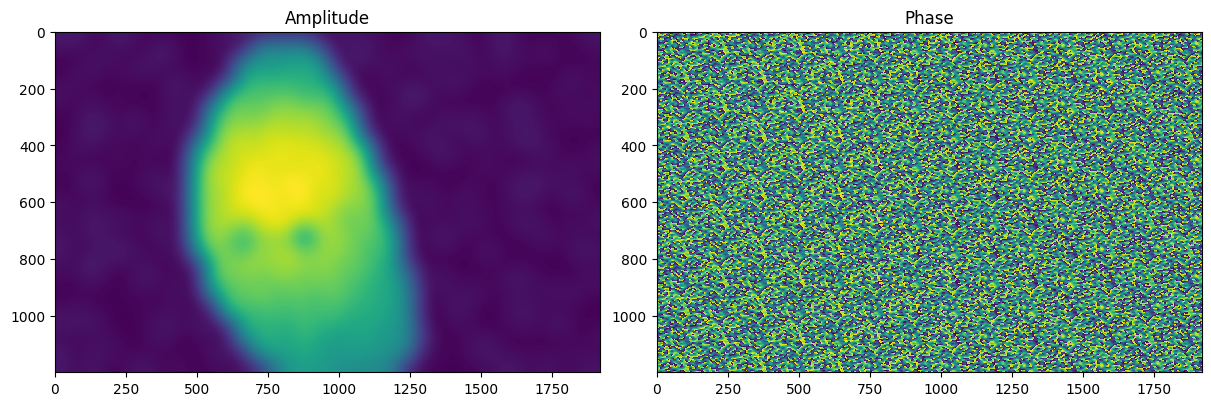

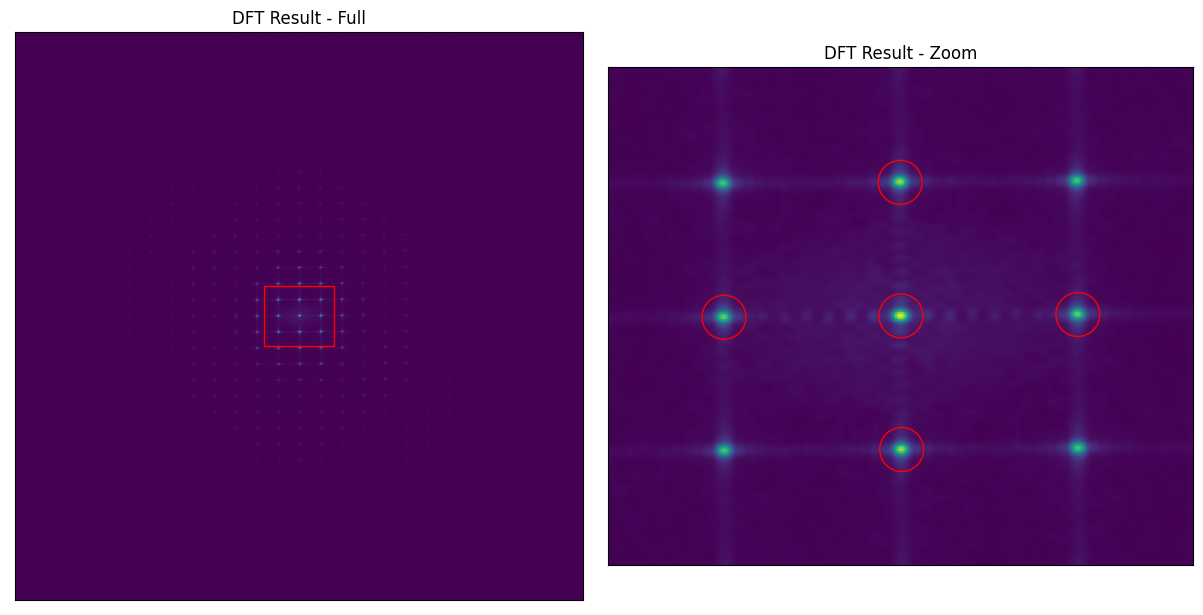

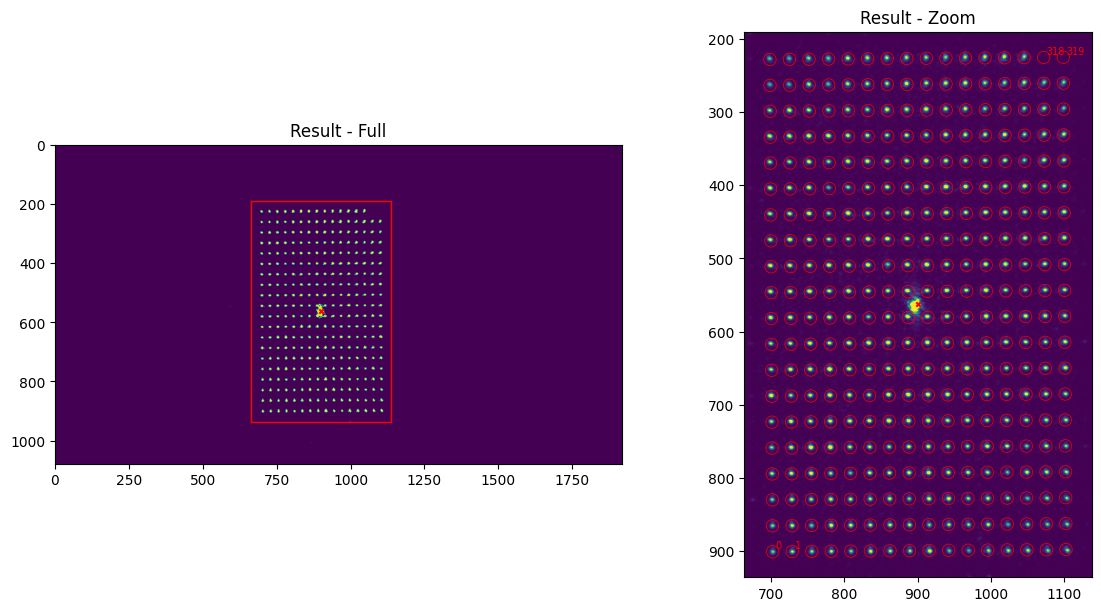

{'M': array([[ 37459.41455429,   -207.28539208],
        [  -285.33065664, -37216.04051703]]),
 'b': array([[900.5],
        [563. ]]),
 'a': array([[0],
        [0]])}

In [160]:
cam.set_exposure(1e-5)
fs.fourier_calibrate(array_shape=[16, 20], array_pitch=[15, 20], maxiter=10)

In [161]:
fs.save_wavefront_calibration()

c:\Users\experiment\repos\qp-slm\docs\examples\09717-SLM-wavefront-calibration_00004.h5
w


'c:\\Users\\experiment\\repos\\qp-slm\\docs\\examples\\09717-SLM-wavefront-calibration_00004.h5'

In [163]:
from slmsuite.holography.lcos_toolbox import get_affine_vectors

In [174]:
v = get_affine_vectors((0,0), (1,0), (0,1), (5,5))

(2, 2)
(2, 1)
(2, 25)


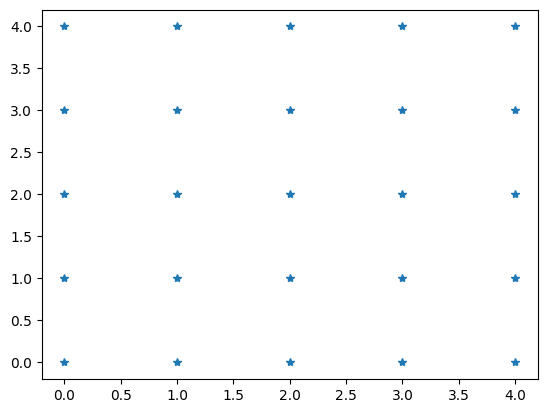

In [175]:
plt.plot(v[0,:], v[1,:], '*')
plt.show()

In [176]:
v[0,:]

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4])